In [33]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, SimpleRNN


# Carregar os dados
df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")

# Dividir os dados em conjuntos de treinamento e teste
split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]

# Preparar dados de treinamento e teste
x_treino = treino.drop(columns='CasosDiasTarget').values
y_treino = treino['CasosDiasTarget'].values

x_teste = teste.drop(columns='CasosDiasTarget').values
y_teste = teste['CasosDiasTarget'].values
y_testeGraf = teste['CasosDiasTarget']



In [34]:
n_steps = 1  # número de passos de tempo
n_features = x_treino.shape[1]  # número de recursos
x_treino = x_treino.reshape((x_treino.shape[0], n_steps, n_features))
x_teste = x_teste.reshape((x_teste.shape[0], n_steps, n_features))

modelos = []
print(n_features) # TA CERTO

4


In [35]:
# Redimensionar os dados para a entrada do LSTM (número de amostras, número de passos de tempo, número de recursos)



# Construir modelo LSTM - 1 CAMADA

rnn1 = Sequential()
rnn1.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
rnn1.add(Dense(1, activation="relu"))
rnn1.compile(optimizer='adam', loss='mse')
modelos.append(rnn1)


lstm1 = Sequential()
lstm1.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
lstm1.add(Dense(1, activation="relu"))
lstm1.compile(optimizer='adam', loss='mse')
modelos.append(lstm1)

lstm2 = Sequential()
lstm2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm2.add(LSTM(50, activation='relu'))
lstm2.add(Dense(1, activation="relu"))
lstm2.compile(optimizer='adam', loss='mse')
modelos.append(lstm2)

lstm3 = Sequential()
lstm3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm3.add(LSTM(50, activation='relu'))
lstm3.add(Dense(1, activation="relu"))
lstm3.compile(optimizer='adam', loss='mse')
modelos.append(lstm3)

gru1 = Sequential()
gru1.add(GRU(50, activation='relu', input_shape=(n_steps, n_features)))
gru1.add(Dense(1, activation="relu"))
gru1.compile(optimizer='adam', loss='mse')
modelos.append(gru1)

# Modelo 2 com duas camadas GRU
gru2 = Sequential()
gru2.add(GRU(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
gru2.add(GRU(50, activation='relu'))
gru2.add(Dense(1, activation="relu"))
gru2.compile(optimizer='adam', loss='mse')
modelos.append(gru2)

# Modelo 3 com três camadas GRU
gru3 = Sequential()
gru3.add(GRU(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
gru3.add(GRU(50, activation='relu', return_sequences=True))
gru3.add(GRU(50, activation='relu'))
gru3.add(Dense(1, activation="relu"))
gru3.compile(optimizer='adam', loss='mse')
modelos.append(gru3)

# Modelo 1 camda lstm e 1 camada GRU
lstm1gru1 = Sequential()
lstm1gru1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm1gru1.add(GRU(50, activation='relu'))
lstm1gru1.add(Dense(1, activation="relu"))
lstm1gru1.compile(optimizer='adam', loss='mse')
modelos.append(lstm1gru1)

# Modelo 1 camda lstm e 1 camada GRU 1 camada lstm e 1 camada GRU
lstm1Gru1_2 = Sequential()
lstm1Gru1_2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm1Gru1_2.add(GRU(50, activation='relu', return_sequences=True))
lstm1Gru1_2.add(LSTM(50, activation='relu', return_sequences=True))
lstm1Gru1_2.add(GRU(50, activation='relu'))
lstm1Gru1_2.add(Dense(1, activation="relu"))
lstm1Gru1_2.compile(optimizer='adam', loss='mse')
modelos.append(lstm1Gru1_2)





c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
indexModelos = ['RNN1','LSTM1','LSTM2','LSTM3','GRU1','GRU2','GRU3', 'LSTM1GRU1', 'LSTM1GRU1LSTM1GRU1']

dfModelos = pd.DataFrame(modelos, index = indexModelos )
display(dfModelos)

i=0
for m in modelos:
  #print(dfModelos.index[i])
  i+=1
  #print(m)

,0
RNN1,"<Sequential name=sequential_18, built=True>"
LSTM1,"<Sequential name=sequential_19, built=True>"
LSTM2,"<Sequential name=sequential_20, built=True>"
LSTM3,"<Sequential name=sequential_21, built=True>"
GRU1,"<Sequential name=sequential_22, built=True>"
GRU2,"<Sequential name=sequential_23, built=True>"
GRU3,"<Sequential name=sequential_24, built=True>"
LSTM1GRU1,"<Sequential name=sequential_25, built=True>"
LSTM1GRU1LSTM1GRU1,"<Sequential name=sequential_26, built=True>"


# TESTE

In [37]:
predDosmodelos = []
opinioesModelos = []
epocas = [100, 200, 500, 1000]

### RNN1

In [38]:
rangeN = 20
model = rnn1
modelname = "rnn1"


melhor_validacao_RNN = float('inf')
modelo = 0

for e in epocas:
    model.fit(x_treino, y_treino, epochs=e, verbose=0)
    # Fazer previsões no conjunto de teste
    opiniaoRNN = model.predict(x_treino)
    mseRnn = mean_squared_error(y_treino, opiniaoRNN).round(2)


    if mseRnn < melhor_validacao_RNN:
        bestParame = e


Bestmodelo = model
Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
opiniaoRNN = Bestmodelo.predict(x_teste)
predDosmodelos.append(opiniaoRNN)
mae = mean_absolute_error(y_teste, opiniaoRNN).round(2)
mse = mean_squared_error(y_teste, opiniaoRNN).round(2)
rmse = np.sqrt(mse).round(2)


dfRNN = pd.DataFrame({
    'EPOCAS': [bestParame],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
O ÚLTIMO VALOR (20) É A MÉDIA !!!


,EPOCAS,MAE,MSE,RMSE
0,1000,12.25,419.19,20.47


### LSTM1

In [39]:
rangeN = 20
model = lstm1
modelname = "lstm1"

melhor_validacao_RNN = float('inf')
modelo = 0

for e in epocas:
    model.fit(x_treino, y_treino, epochs=e, verbose=0)
    # Fazer previsões no conjunto de teste
    opiniaoRNN = model.predict(x_treino)
    mseRnn = mean_squared_error(y_treino, opiniaoRNN).round(2)


    if mseRnn < melhor_validacao_RNN:
        bestParame = e


Bestmodelo = model
Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
opiniaoRNN = Bestmodelo.predict(x_teste)
predDosmodelos.append(opiniaoRNN)
mae = mean_absolute_error(y_teste, opiniaoRNN).round(2)
mse = mean_squared_error(y_teste, opiniaoRNN).round(2)
rmse = np.sqrt(mse).round(2)


dfRNN = pd.DataFrame({
    'EPOCAS': [bestParame],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
O ÚLTIMO VALOR (20) É A MÉDIA !!!


,EPOCAS,MAE,MSE,RMSE
0,1000,14.88,577.63,24.03


### LSTM2

In [40]:
rangeN = 20
model = lstm2
modelname = "lstm2"

melhor_validacao_RNN = float('inf')
modelo = 0

for e in epocas:
    model.fit(x_treino, y_treino, epochs=e, verbose=0)
    # Fazer previsões no conjunto de teste
    opiniaoRNN = model.predict(x_treino)
    mseRnn = mean_squared_error(y_treino, opiniaoRNN).round(2)


    if mseRnn < melhor_validacao_RNN:
        bestParame = e


Bestmodelo = model
Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
opiniaoRNN = Bestmodelo.predict(x_teste)
predDosmodelos.append(opiniaoRNN)
mae = mean_absolute_error(y_teste, opiniaoRNN).round(2)
mse = mean_squared_error(y_teste, opiniaoRNN).round(2)
rmse = np.sqrt(mse).round(2)


dfRNN = pd.DataFrame({
    'EPOCAS': [bestParame],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
O ÚLTIMO VALOR (20) É A MÉDIA !!!


,EPOCAS,MAE,MSE,RMSE
0,1000,16.52,810.12,28.46


### LSTM3

In [41]:
rangeN = 20
model = lstm3
modelname = "lstm3"

melhor_validacao_RNN = float('inf')
modelo = 0

for e in epocas:
    model.fit(x_treino, y_treino, epochs=e, verbose=0)
    # Fazer previsões no conjunto de teste
    opiniaoRNN = model.predict(x_treino)
    mseRnn = mean_squared_error(y_treino, opiniaoRNN).round(2)


    if mseRnn < melhor_validacao_RNN:
        bestParame = e


Bestmodelo = model
Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
opiniaoRNN = Bestmodelo.predict(x_teste)
predDosmodelos.append(opiniaoRNN)
mae = mean_absolute_error(y_teste, opiniaoRNN).round(2)
mse = mean_squared_error(y_teste, opiniaoRNN).round(2)
rmse = np.sqrt(mse).round(2)


dfRNN = pd.DataFrame({
    'EPOCAS': [bestParame],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
O ÚLTIMO VALOR (20) É A MÉDIA !!!


,EPOCAS,MAE,MSE,RMSE
0,1000,14.76,667.97,25.85


### GRU1

In [42]:
rangeN = 20
model = gru1
modelname = "gru1"

melhor_validacao_RNN = float('inf')
modelo = 0

for e in epocas:
    model.fit(x_treino, y_treino, epochs=e, verbose=0)
    # Fazer previsões no conjunto de teste
    opiniaoRNN = model.predict(x_treino)
    mseRnn = mean_squared_error(y_treino, opiniaoRNN).round(2)


    if mseRnn < melhor_validacao_RNN:
        bestParame = e


Bestmodelo = model
Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
opiniaoRNN = Bestmodelo.predict(x_teste)
predDosmodelos.append(opiniaoRNN)
mae = mean_absolute_error(y_teste, opiniaoRNN).round(2)
mse = mean_squared_error(y_teste, opiniaoRNN).round(2)
rmse = np.sqrt(mse).round(2)


dfRNN = pd.DataFrame({
    'EPOCAS': [bestParame],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
O ÚLTIMO VALOR (20) É A MÉDIA !!!


,EPOCAS,MAE,MSE,RMSE
0,1000,14.43,577.83,24.04


### GRU2

In [43]:
rangeN = 20
model = gru2
modelname = "gru2"

melhor_validacao_RNN = float('inf')
modelo = 0

for e in epocas:
    model.fit(x_treino, y_treino, epochs=e, verbose=0)
    # Fazer previsões no conjunto de teste
    opiniaoRNN = model.predict(x_treino)
    mseRnn = mean_squared_error(y_treino, opiniaoRNN).round(2)


    if mseRnn < melhor_validacao_RNN:
        bestParame = e


Bestmodelo = model
Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
opiniaoRNN = Bestmodelo.predict(x_teste)
predDosmodelos.append(opiniaoRNN)
mae = mean_absolute_error(y_teste, opiniaoRNN).round(2)
mse = mean_squared_error(y_teste, opiniaoRNN).round(2)
rmse = np.sqrt(mse).round(2)


dfRNN = pd.DataFrame({
    'EPOCAS': [bestParame],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
O ÚLTIMO VALOR (20) É A MÉDIA !!!


,EPOCAS,MAE,MSE,RMSE
0,1000,16.28,821.69,28.67


### GRU3

In [44]:
rangeN = 20
model = gru3
modelname = "gru3"

melhor_validacao_RNN = float('inf')
modelo = 0

for e in epocas:
    model.fit(x_treino, y_treino, epochs=e, verbose=0)
    # Fazer previsões no conjunto de teste
    opiniaoRNN = model.predict(x_treino)
    mseRnn = mean_squared_error(y_treino, opiniaoRNN).round(2)


    if mseRnn < melhor_validacao_RNN:
        bestParame = e


Bestmodelo = model
Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
opiniaoRNN = Bestmodelo.predict(x_teste)
predDosmodelos.append(opiniaoRNN)
mae = mean_absolute_error(y_teste, opiniaoRNN).round(2)
mse = mean_squared_error(y_teste, opiniaoRNN).round(2)
rmse = np.sqrt(mse).round(2)


dfRNN = pd.DataFrame({
    'EPOCAS': [bestParame],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
O ÚLTIMO VALOR (20) É A MÉDIA !!!


,EPOCAS,MAE,MSE,RMSE
0,1000,16.16,985.34,31.39


### LSTM1GRU1

In [45]:
rangeN = 20
model = lstm1gru1
modelname = "lstm1gru1"

melhor_validacao_RNN = float('inf')
modelo = 0

for e in epocas:
    model.fit(x_treino, y_treino, epochs=e, verbose=0)
    # Fazer previsões no conjunto de teste
    opiniaoRNN = model.predict(x_treino)
    mseRnn = mean_squared_error(y_treino, opiniaoRNN).round(2)


    if mseRnn < melhor_validacao_RNN:
        bestParame = e


Bestmodelo = model
Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
opiniaoRNN = Bestmodelo.predict(x_teste)
predDosmodelos.append(opiniaoRNN)
mae = mean_absolute_error(y_teste, opiniaoRNN).round(2)
mse = mean_squared_error(y_teste, opiniaoRNN).round(2)
rmse = np.sqrt(mse).round(2)


dfRNN = pd.DataFrame({
    'EPOCAS': [bestParame],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
O ÚLTIMO VALOR (20) É A MÉDIA !!!


,EPOCAS,MAE,MSE,RMSE
0,1000,16.12,705.89,26.57


### LSTM1GRU1 + LSTM1GRU1

In [46]:
rangeN = 20
model = lstm1Gru1_2
modelname = "lstm1Gru1_2"

melhor_validacao_RNN = float('inf')
modelo = 0

for e in epocas:
    model.fit(x_treino, y_treino, epochs=e, verbose=0)
    # Fazer previsões no conjunto de teste
    opiniaoRNN = model.predict(x_treino)
    mseRnn = mean_squared_error(y_treino, opiniaoRNN).round(2)


    if mseRnn < melhor_validacao_RNN:
        bestParame = e


Bestmodelo = model
Bestmodelo.fit(x_treino, y_treino, epochs=bestParame, verbose=0)
opiniaoRNN = Bestmodelo.predict(x_teste)
predDosmodelos.append(opiniaoRNN)
mae = mean_absolute_error(y_teste, opiniaoRNN).round(2)
mse = mean_squared_error(y_teste, opiniaoRNN).round(2)
rmse = np.sqrt(mse).round(2)


dfRNN = pd.DataFrame({
    'EPOCAS': [bestParame],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

stringname = 'resultadosModelos/df' + modelname + '.csv'

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv(stringname, sep = ';', index = False, encoding='UTF-8')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
O ÚLTIMO VALOR (20) É A MÉDIA !!!


,EPOCAS,MAE,MSE,RMSE
0,1000,13.78,551.48,23.48


In [47]:
import joblib


joblib.dump(predDosmodelos, 'predsSalva/rnn.pkl')


['predsSalva/rnn.pkl']

# CHECKPOINT

In [48]:
import joblib

predDosmodelos = joblib.load('predsSalva/rnn.pkl')

In [49]:

opiniaoModelo = 0
validaModelo = float('inf')

for i in range(len(indexModelos)):
  opiniaoModelo = mean_squared_error(y_teste, predDosmodelos[i]).round(2)
  print(opiniaoModelo)
  if opiniaoModelo < validaModelo:
    validaModelo = opiniaoModelo
    nomeModelo = indexModelos[i]
    melhorModelo = predDosmodelos[i]

print('\n')
print(nomeModelo)
#print(validaModelo)


#print(melhorModelo)
print(len(melhorModelo))




419.19
577.63
810.12
667.97
577.83
821.69
985.34
705.89
551.48


RNN1
415


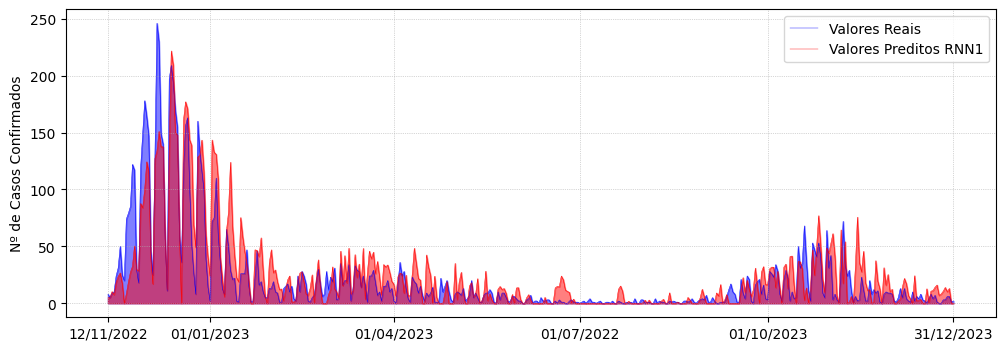

Numero de casos reais:  8737
Numero de casos predito:  9932


In [50]:
serie = pd.Series(np.array(melhorModelo).flatten(), index = y_testeGraf.index)

stringGraf = 'graficos/4-'+ 'rnn' + nomeModelo + '.pdf'
plt.figure(figsize=(12, 4))
plt.plot(y_testeGraf, label='Valores Reais', color='blue', linewidth=0.3)
plt.plot(serie, label=('Valores Preditos ' + nomeModelo), color='red', linewidth=0.3)#plt.fill_between(x_teste.index, y_teste, color='blue', alpha=0.5)
plt.fill_between(y_testeGraf.index, y_testeGraf, color='blue', alpha=0.5)
plt.fill_between(serie.index, serie, color='red', alpha=0.5)  # Pinta a área entre as linhas
plt.ylabel('Nº de Casos Confirmados')
plt.legend()
ticks_pos = [df[split:].index[0], '2023-01','2023-04', '2023-07','2023-10', df[split:].index[-1]]
ticks_labels = [
    '12/11/2022',
    '01/01/2023',
    '01/04/2023',
    '01/07/2022',
    '01/10/2023',
    '31/12/2023',
]
plt.grid(linestyle=':', linewidth=.5, alpha=1)
plt.xticks(ticks_pos, labels=ticks_labels)
plt.savefig(stringGraf, dpi=300, bbox_inches="tight")
plt.show()

n_pred = int(serie.sum())
print('Numero de casos reais: ', y_teste.sum())
print('Numero de casos predito: ', n_pred)


0
1
2
3
4
5
6
7
8


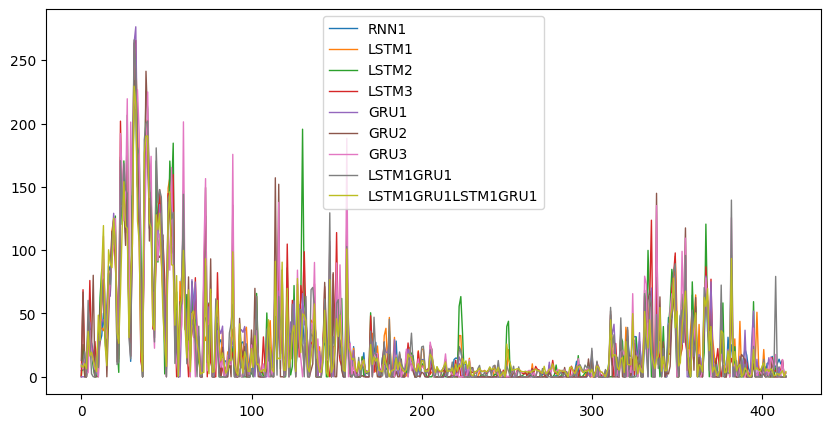

In [64]:



plt.figure(figsize=(10, 5))

rangen = len(indexModelos)
#rangen = 2

for i in (range(rangen)):
  print(i)
  plt.plot(predDosmodelos[i], label=indexModelos[i], linewidth=1)
plt.legend()
plt.savefig('graficos/4-RNN.pdf', dpi=300, bbox_inches = "tight")
plt.show()

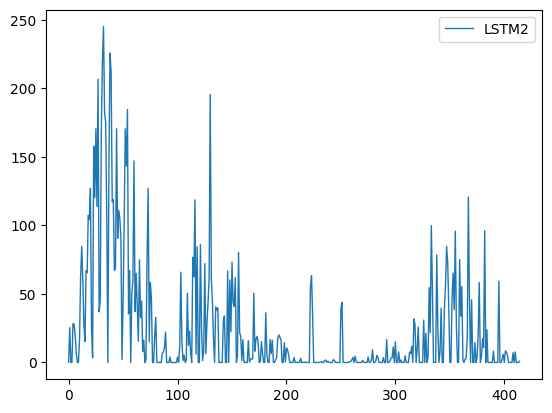

In [62]:

plt.plot(predDosmodelos[2], label=indexModelos[2], linewidth=1)
plt.legend()
plt.savefig('graficos/4-RNN.pdf', dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
plt.plot(predDosmodelos[8], label=indexModelos[8], linewidth=1)
plt.legend()
plt.savefig('graficos/4-RNN.pdf', dpi=300, bbox_inches = "tight")
plt.show()

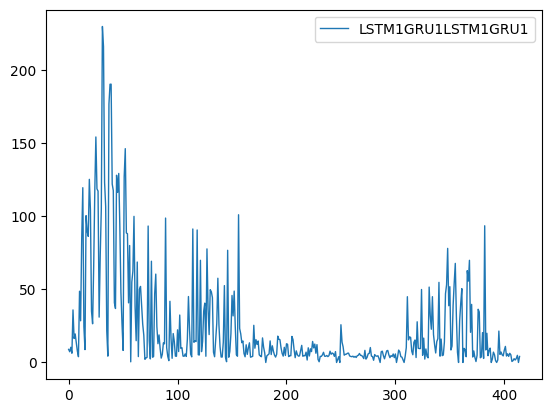

In [58]:

plt.plot(predDosmodelos[8], label=indexModelos[8], linewidth=1)
plt.legend()
plt.savefig('graficos/4-RNN.pdf', dpi=300, bbox_inches = "tight")
plt.show()